In [140]:
using Plots
using Plots.PlotMeasures

In [142]:
function norma(wiel::Function, krok::Float64)
    f = x -> 1.0/(1.0+25.0*x^2)
    max = 0.0
    for x_k = -1.0 : krok : 1.0
        blad = abs(f(x_k) - wiel(x_k))
        if blad > max
            max = blad
        end
    end
    return max
end

norma (generic function with 2 methods)

In [143]:
function w_a(x::Float64)
    w_x = 0.0
    pocz = -1.0
    kon = 1.0
    h = (kon - pocz)/9.0
    f = x -> 1.0/(1.0+25.0*x^2)
    for i = 0 : 9
        iloczyn = 1.0
        for j = 0 : 9
            if i != j 
                iloczyn = iloczyn * ((x - (pocz + j*h))/((pocz + i*h) - (pocz + j*h)))
            end
        end
        w_x = w_x + f(pocz + i*h)*iloczyn
    end
    return w_x
end

w_a (generic function with 1 method)

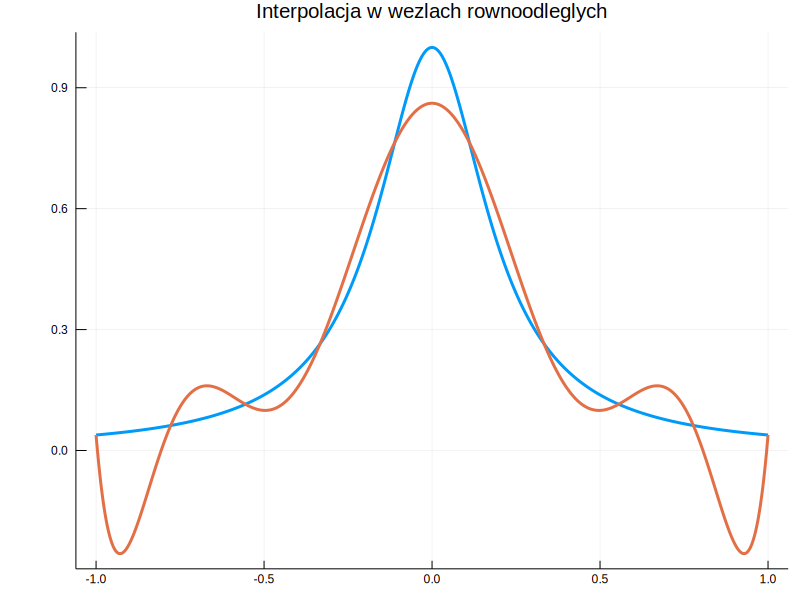

In [144]:
plot(-1:0.001:1, x -> 1.0/(1.0+25.0*x^2), seriestype = :line, lw=3, size=(800, 600), left_margin = 10mm,
    title="Interpolacja w wezlach rownoodleglych", legend = :none)
plot!(-1:0.001:1, w_a, seriestype = :line, lw=3, size=(800, 600), left_margin = 10mm,
    title="Interpolacja w wezlach rownoodleglych", legend = :none)

In [145]:
norma(w_a, 0.001)

0.30029398789261813

In [146]:
function w_b(x::Float64)
    n = 9.0
    w_x = 0.0
    f = x -> 1.0/(1.0+25.0*x^2)
    for i = 0 : n
        iloczyn = 1.0
        for j = 0 : n
            if i != j 
                iloczyn = iloczyn * ((x - (cos(pi*(2*j+1)/(2*n+2))))/
                        ((cos(pi*(2*i+1)/(2*n + 2))) - (cos(pi*(2*j+1)/(2*n + 2)))))
            end
        end
        w_x = w_x + f(cos(pi*(2*i+1)/(2*n + 2)))*iloczyn
    end
    return w_x
end

w_b (generic function with 1 method)

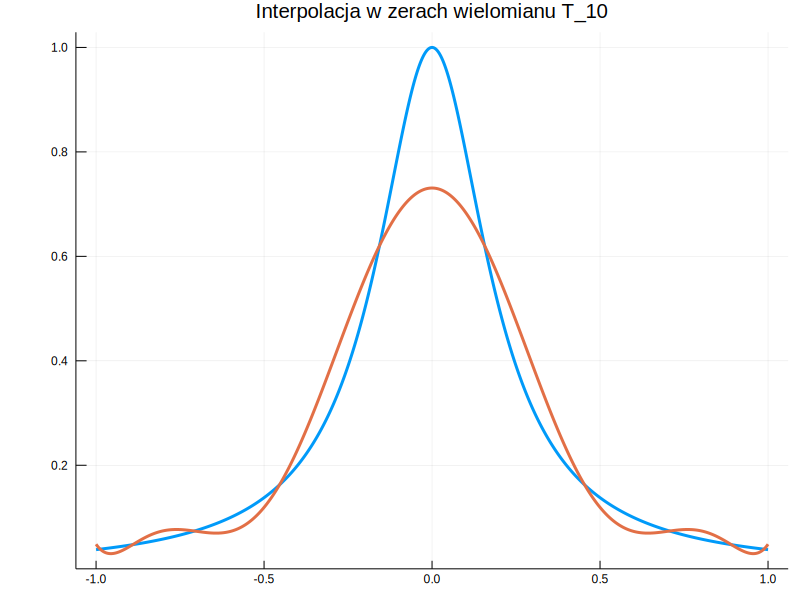

In [147]:
plot(-1:0.001:1, x -> 1.0/(1.0+25.0*x^2), seriestype = :line, lw=3, size=(800, 600), left_margin = 10mm,
    title="Interpolacja w zerach wielomianu T_10", legend = :none)
plot!(-1:0.001:1, w_b, seriestype = :line, lw=3, size=(800, 600), left_margin = 10mm,
    title="Interpolacja w zerach wielomianu T_10", legend = :none)

In [148]:
norma(w_b, 0.001)

0.2691783353450815

In [149]:
function w_c(x::Float64)
    n = 9.0
    w_x = 0.0
    f = x -> 1.0/(1.0+25.0*x^2)
    for i = 0 : n
        iloczyn = 1.0
        for j = 0 : n
            if i != j 
                iloczyn = iloczyn * ((x - (cos(pi*j/n)))/
                        ((cos(pi*i/n)) - (cos(pi*j/n))))
            end
        end
        w_x = w_x + f(cos(pi*i/n))*iloczyn
    end
    return w_x
end

w_c (generic function with 1 method)

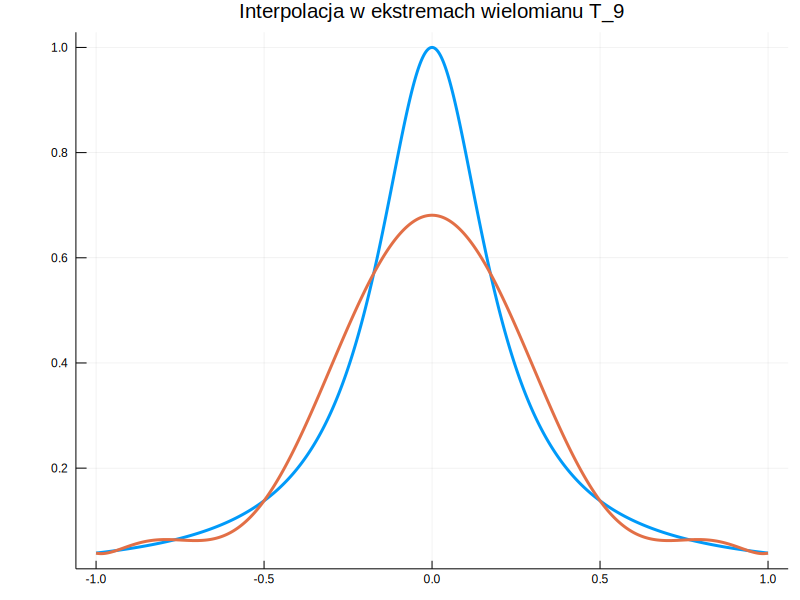

In [151]:
plot(-1:0.001:1, x -> 1.0/(1.0+25.0*x^2), seriestype = :line, lw=3, size=(800, 600), left_margin = 10mm,
    title="Interpolacja w ekstremach wielomianu T_9", legend = :none)
plot!(-1:0.001:1, w_c, seriestype = :line, lw=3, size=(800, 600), left_margin = 10mm,
    title="Interpolacja w ekstremach wielomianu T_9", legend = :none)

In [152]:
norma(w_c, 0.001)

0.31909525473477307

In [153]:
function metoda_zlozona_trapezow(f::Function, a::Float64, b::Float64, n::Int64)
    suma = 0.0
    h = (b-a)/Float64(n)
    for i = 1 : n-1
        suma = suma + f(a + i*h)
    end
    wynik = 0.5*h*(f(a) + f(b) + 2*suma)
    return wynik
end

metoda_zlozona_trapezow (generic function with 1 method)

In [154]:
function metoda_zlozona_trapezow_posrednie_do_exp_2_n(f::Function, a::Float64, b::Float64, n::Int64)
    wyniki = zeros(Float64, n+1)
    h = (b-a)
    wyk = 1
    x_i = 0.0
    wyniki[1] = 0.5*h*(f(a) + f(b))
    for k = 1 : n
        suma = 0.0
        h = h/2
        for i = 1 : wyk
            suma = suma + f(a+(2*i-1)*h)
        end
        wyniki[k+1] = 0.5 * wyniki[k] + h * suma
        wyk = wyk*2
    end
    return wyniki
end

metoda_zlozona_trapezow_posrednie_do_exp_2_n (generic function with 1 method)

In [155]:
function metoda_romberga(f::Function, a::Float64, b::Float64, n::Int64)
    R = metoda_zlozona_trapezow_posrednie_do_exp_2_n(f, a, b, n)
    pot4 = 1.0
    for k = 1 : n
        pot4 = pot4 * 4.0
        for i = n :-1: k
            R[i+1] = (pot4 * R[i+1] - R[i])/(pot4 - 1)
        end
    end
    return R[n+1]
end

metoda_romberga (generic function with 1 method)

In [158]:
function T(k::Float64)
    return x -> cos(k*acos(x))
end

T (generic function with 2 methods)

In [159]:
function kwadratura_gaussa_czebyszewa(f::Function, n::Int64)
    suma = 0.0
    for i = 1 : n
        suma = suma + pi/Float64(n) * f(cos(pi * (2*i-1)/(2*n)))
    end
    return suma
end

kwadratura_gaussa_czebyszewa (generic function with 1 method)

In [161]:
function w_e(x::Float64)
    n = 9.0
    f = x -> 1.0/(1.0+25.0*x^2)
    w_x = 0.5*T(0.0)(x) * kwadratura_gaussa_czebyszewa(x -> f(x) * T(Float64(0.0))(x), Int64(10))
    for k = 1 : n
        w_x = w_x + T(Float64(k))(x) * kwadratura_gaussa_czebyszewa(x -> f(x) * T(Float64(k))(x), Int64(10))
    end
    w_x = w_x * 2/pi
    return w_x
end

w_e (generic function with 1 method)

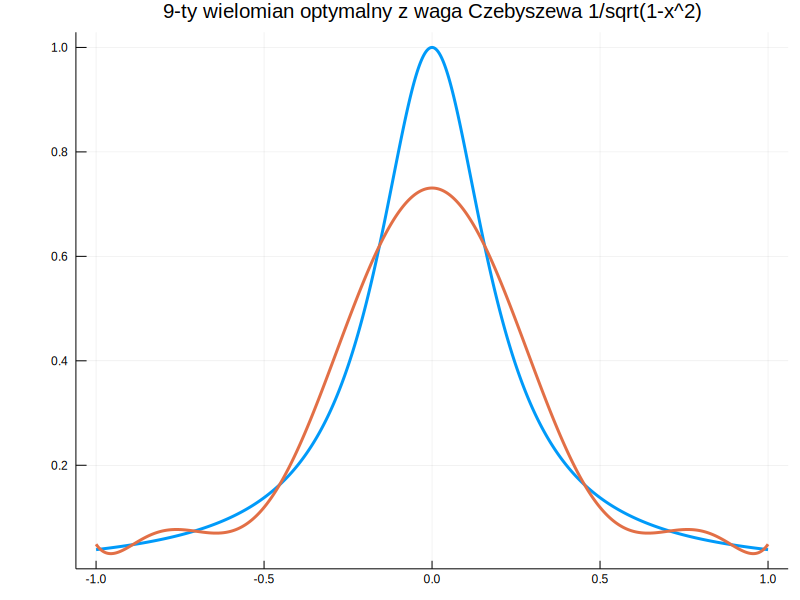

In [172]:
plot(-1:0.001:1, x -> 1.0/(1.0+25.0*x^2), seriestype = :line, lw=3, size=(800, 600), left_margin = 10mm,
    title="9-ty wielomian optymalny z waga Czebyszewa 1/sqrt(1-x^2)", legend = :none)
plot!(-1:0.001:1, w_e, seriestype = :line, lw=3, size=(800, 600), left_margin = 10mm,
    title="9-ty wielomian optymalny z waga Czebyszewa 1/sqrt(1-x^2)", legend = :none)

In [165]:
norma(w_e, 0.001)

0.26917833534508084

In [166]:
function P(n)
    function P_n(x::Float64)
        suma = 0.0
        for k = 0 : n
            suma = suma + binomial(Int64(n), Int64(k))^2 * (x-1.0)^(n-k) * (x+1.0)^k
        end
        return suma
    end
    return P_n
end

P (generic function with 1 method)

In [167]:
function w_d(x::Float64)
    n = 9.0
    f = x -> 1.0/(1.0+25.0*x^2)
    w_x = 0.0
    for k = 0 : n
        w_x = w_x + P(k)(x) * metoda_romberga(x -> f(x) * P(k)(x), -1.0, 1.0, Int64(10)) /  
                                       metoda_romberga(x -> P(k)(x) * P(k)(x), -1.0, 1.0, Int64(10))
    end
    return w_x
end

w_d (generic function with 1 method)

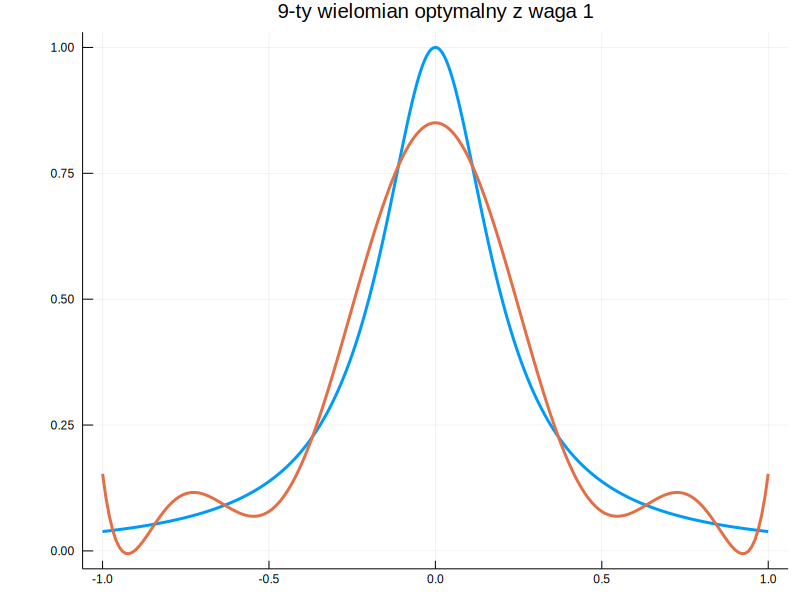

In [173]:
plot(-1:0.001:1, x -> 1.0/(1.0+25.0*x^2), seriestype = :line, lw=3, size=(800, 600), left_margin = 10mm,
    title="9-ty wielomian optymalny z waga 1", legend = :none)
plot!(-1:0.01:1, w_d, seriestype = :line, lw=3, size=(800, 600), left_margin = 10mm,
    title="9-ty wielomian optymalny z waga 1", legend = :none)

In [174]:
norma(w_d, 0.01)

0.14958350156008937